# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Get the Data

In [136]:
adver = pd.read_csv('/Users/carlosoliver/Desktop/BOOTCAMP/DataScience-Mar2024/3-Machine_Learning/2-Classification/4-Logistic_Regression/ejercicios/data/advertising.csv', sep=',')
adver

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


# 1. Exploratory Data Analysis

In [137]:
adver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [138]:
adverlim = adver.drop(columns=['Ad Topic Line', 'City', 'Country', 'Timestamp'])


In [139]:
adver

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


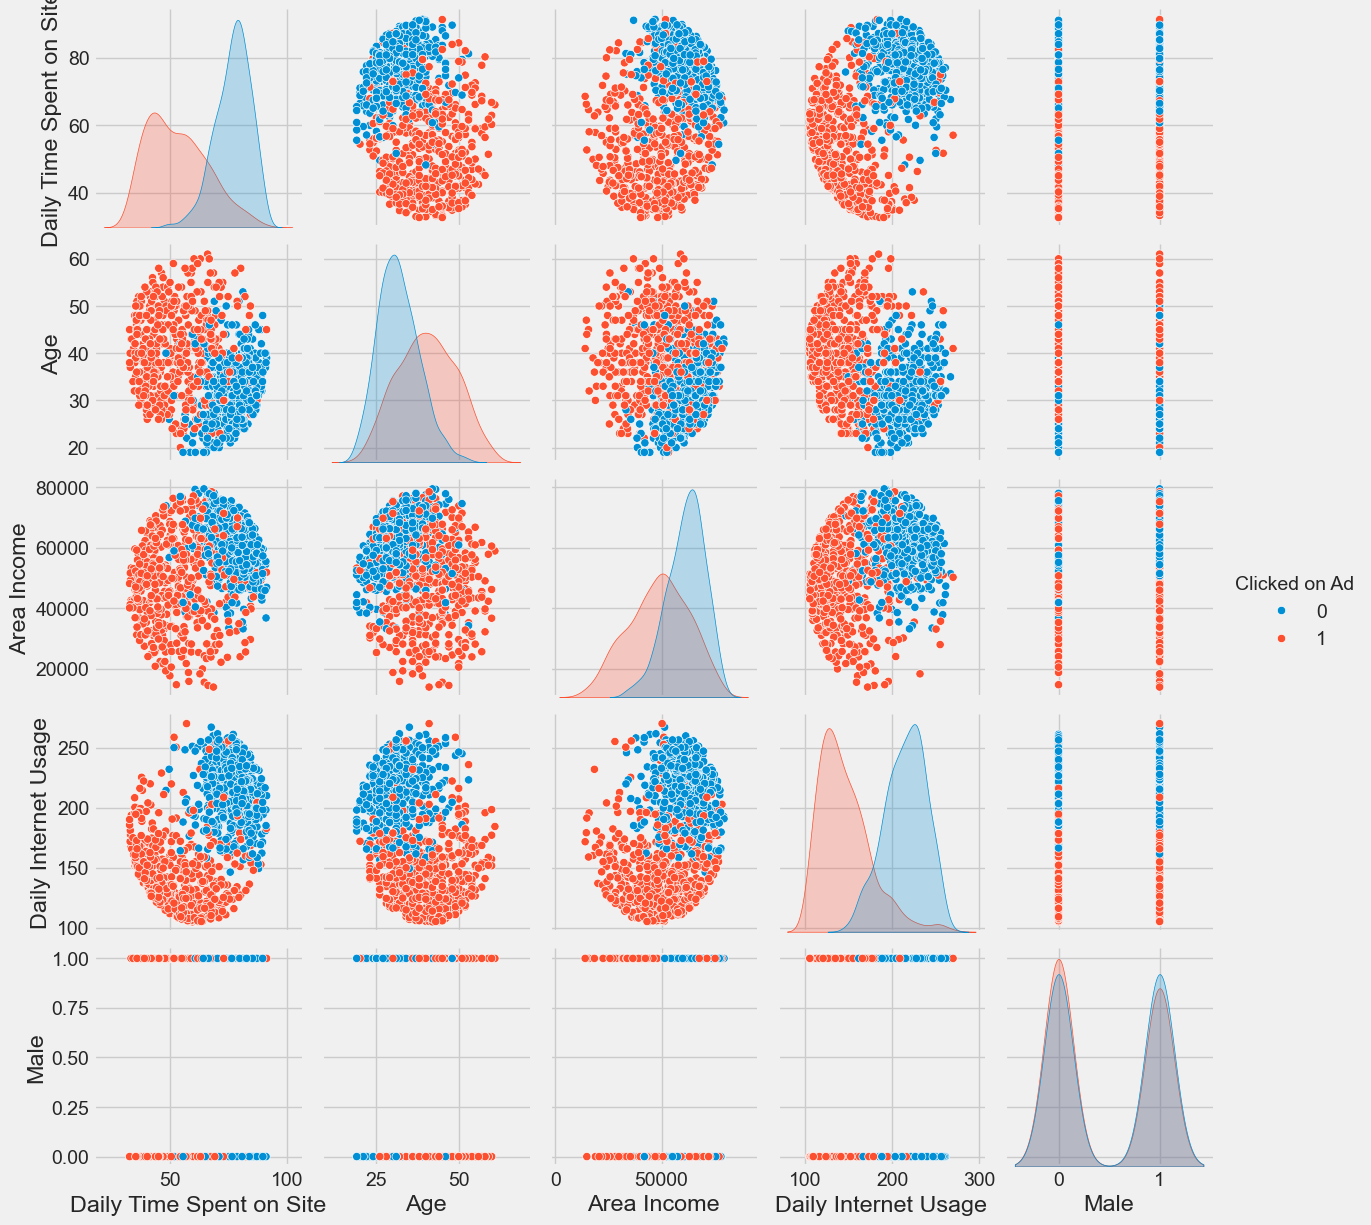

In [140]:
# en el sns.pairplot , metele de argumento hue= "Clicked on Ad"

sns.pairplot(adverlim, hue= "Clicked on Ad")

<Axes: >

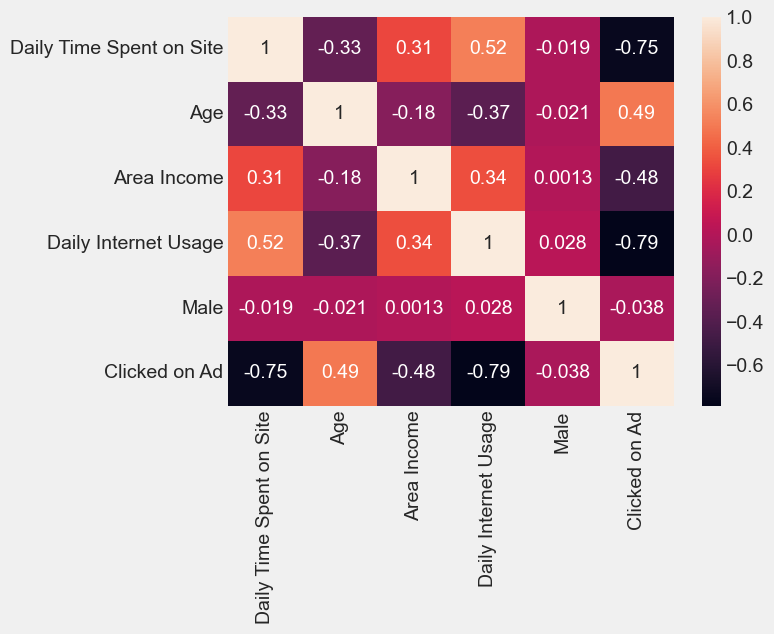

In [141]:
sns.heatmap(adverlim.corr(), annot= True)

# 2. Prepare Data for Logistic Regression



#### 1. Feature engineering


In [142]:
from sklearn.linear_model import LogisticRegression

adver.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [143]:
adver.iloc[:,-1] = adver['Ad Topic Line'].str.split(' ').values

/var/folders/z3/hzk3_13n5c10wmqwhtszhh840000gn/T/ipykernel_3718/1902211351.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[list(['Cloned', '5thgeneration', 'orchestration'])
 list(['Monitored', 'national', 'standardization'])
 list(['Organic', 'bottom-line', 'service-desk'])
 list(['Triple-buffered', 'reciprocal', 'time-frame'])
 list(['Robust', 'logistical', 'utilization'])
 list(['Sharable', 'client-driven', 'software'])
 list(['Enhanced', 'dedicated', 'support'])
 list(['Reactive', 'local', 'challenge'])
 list(['Configurable', 'coherent', 'function'])
 list(['Mandatory', 'homogeneous', 'architecture'])
 list(['Centralized', 'neutral', 'neural-net'])
 list(['Team-oriented', 'grid-enabled', 'Local', 'Area', 'Network'])
 list(['Centralized', 'content-based', 'focus', 'group'])
 list(['Synergistic', 'fresh-thinking', 'array'])
 list(['Grass-roots', 'coherent', 'extranet'])
 list(['Persistent', 'demand-driven', 

In [144]:
# Crea una columna en donde si "orchestration" se encuentra dentro de "Ad Topic Line" valga 1 y si no 0

In [145]:
# Aplica un Label Encoder a Ad Topic Line y City

In [146]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [147]:
le.fit_transform(adver['Ad Topic Line'])

array([ 91, 464, 566, 903, 766, 805, 222, 723, 107, 454,  86, 877,  83,
       856, 358, 590, 159, 411, 365,   6, 520, 833, 452, 353, 257, 683,
        19, 467, 523,  77, 664, 196, 190, 482, 841, 850, 661, 719, 587,
       414, 399, 310, 586,  57, 742, 569,  69, 897, 996,  78, 581, 999,
       635, 803, 875, 804, 125, 580, 932, 604, 138, 308, 822, 298, 828,
       940, 851, 575, 247, 868, 145,  11, 170, 615, 151, 781, 783, 362,
       185, 152, 673, 393, 219, 832, 207, 905, 882, 405, 598, 532, 218,
       627, 957, 245,  43, 676, 961, 339, 928, 777, 588,  84, 391, 834,
       609,  60, 286, 169, 149, 547, 955, 352, 274, 376, 975, 836, 293,
        52, 148,  16, 629, 795, 368, 616, 186, 949, 134, 613,  87, 351,
       220, 739, 970, 663, 946, 230, 489, 136, 341, 675, 922, 701, 331,
       941, 243, 730, 180, 620, 237, 212, 610, 471, 333,   0,  42, 296,
       923, 806, 197, 441, 504, 707, 380, 214, 907, 144, 984, 273, 706,
       137, 866,  10, 785, 762,  88, 475, 864, 737,   2, 505, 65

In [148]:
adver

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,"[Cloned, 5thgeneration, orchestration]"
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,"[Monitored, national, standardization]"
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,"[Organic, bottom-line, service-desk]"
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,"[Triple-buffered, reciprocal, time-frame]"
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,"[Robust, logistical, utilization]"
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,"[Fundamental, modular, algorithm]"
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,"[Grass-roots, cohesive, monitoring]"
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,"[Expanded, intangible, solution]"
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,"[Proactive, bandwidth-monitored, policy]"


In [149]:
# Haz un drop de la siguentes columnas 'Ad Topic Line', 'City', 'Male', 'Country', 'orchestration'

In [150]:
adver_strings_removed = adver.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)


In [151]:
# Convierte la columna Timestamp a datetime

pd.to_datetime(adver['Timestamp'])

0     2016-03-27 00:53:11
1     2016-04-04 01:39:02
2     2016-03-13 20:35:42
3     2016-01-10 02:31:19
4     2016-06-03 03:36:18
              ...        
995   2016-02-11 21:49:00
996   2016-04-22 02:07:01
997   2016-02-01 17:24:57
998   2016-03-24 02:35:54
999   2016-06-03 21:43:21
Name: Timestamp, Length: 1000, dtype: datetime64[ns]

In [152]:
adver_strings_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   object 
dtypes: float64(3), int64(2), object(1)
memory usage: 47.0+ KB


In [153]:
adver_strings_removed

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,"[Cloned, 5thgeneration, orchestration]"
1,80.23,31,68441.85,193.77,1,"[Monitored, national, standardization]"
2,69.47,26,59785.94,236.50,0,"[Organic, bottom-line, service-desk]"
3,74.15,29,54806.18,245.89,1,"[Triple-buffered, reciprocal, time-frame]"
4,68.37,35,73889.99,225.58,0,"[Robust, logistical, utilization]"
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,"[Fundamental, modular, algorithm]"
996,51.30,45,67782.17,134.42,1,"[Grass-roots, cohesive, monitoring]"
997,51.63,51,42415.72,120.37,1,"[Expanded, intangible, solution]"
998,55.55,19,41920.79,187.95,0,"[Proactive, bandwidth-monitored, policy]"


In [154]:
# Crea tres columnas nuevas que sean: "month", "hour", "weekday".
# Usa la columna "Timestamp" para extraer esos valores

# Convertir la columna "Timestamp" a formato de fecha y hora
adver_strings_removed['Timestamp'] = pd.to_datetime(adver['Timestamp'])

# Extraer el mes, la hora y el día de la semana
adver['month'] = adver['Timestamp'].dt.month
adver['hour'] = adver['Timestamp'].dt.hour
adver['weekday'] = adver['Timestamp'].dt.weekday

# Mostrar el DataFrame con las nuevas columnas
adver

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
adver_strings_removed

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Orchestration
0,68.95,35,61833.90,256.09,0,0,1
1,80.23,31,68441.85,193.77,1,0,0
2,69.47,26,59785.94,236.50,0,0,0
3,74.15,29,54806.18,245.89,1,0,0
4,68.37,35,73889.99,225.58,0,0,0
...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,0
996,51.30,45,67782.17,134.42,1,1,0
997,51.63,51,42415.72,120.37,1,1,0
998,55.55,19,41920.79,187.95,0,0,0


In [ ]:
# en el sns.pairplot , metele de argumento hue= "Clicked on Ad"

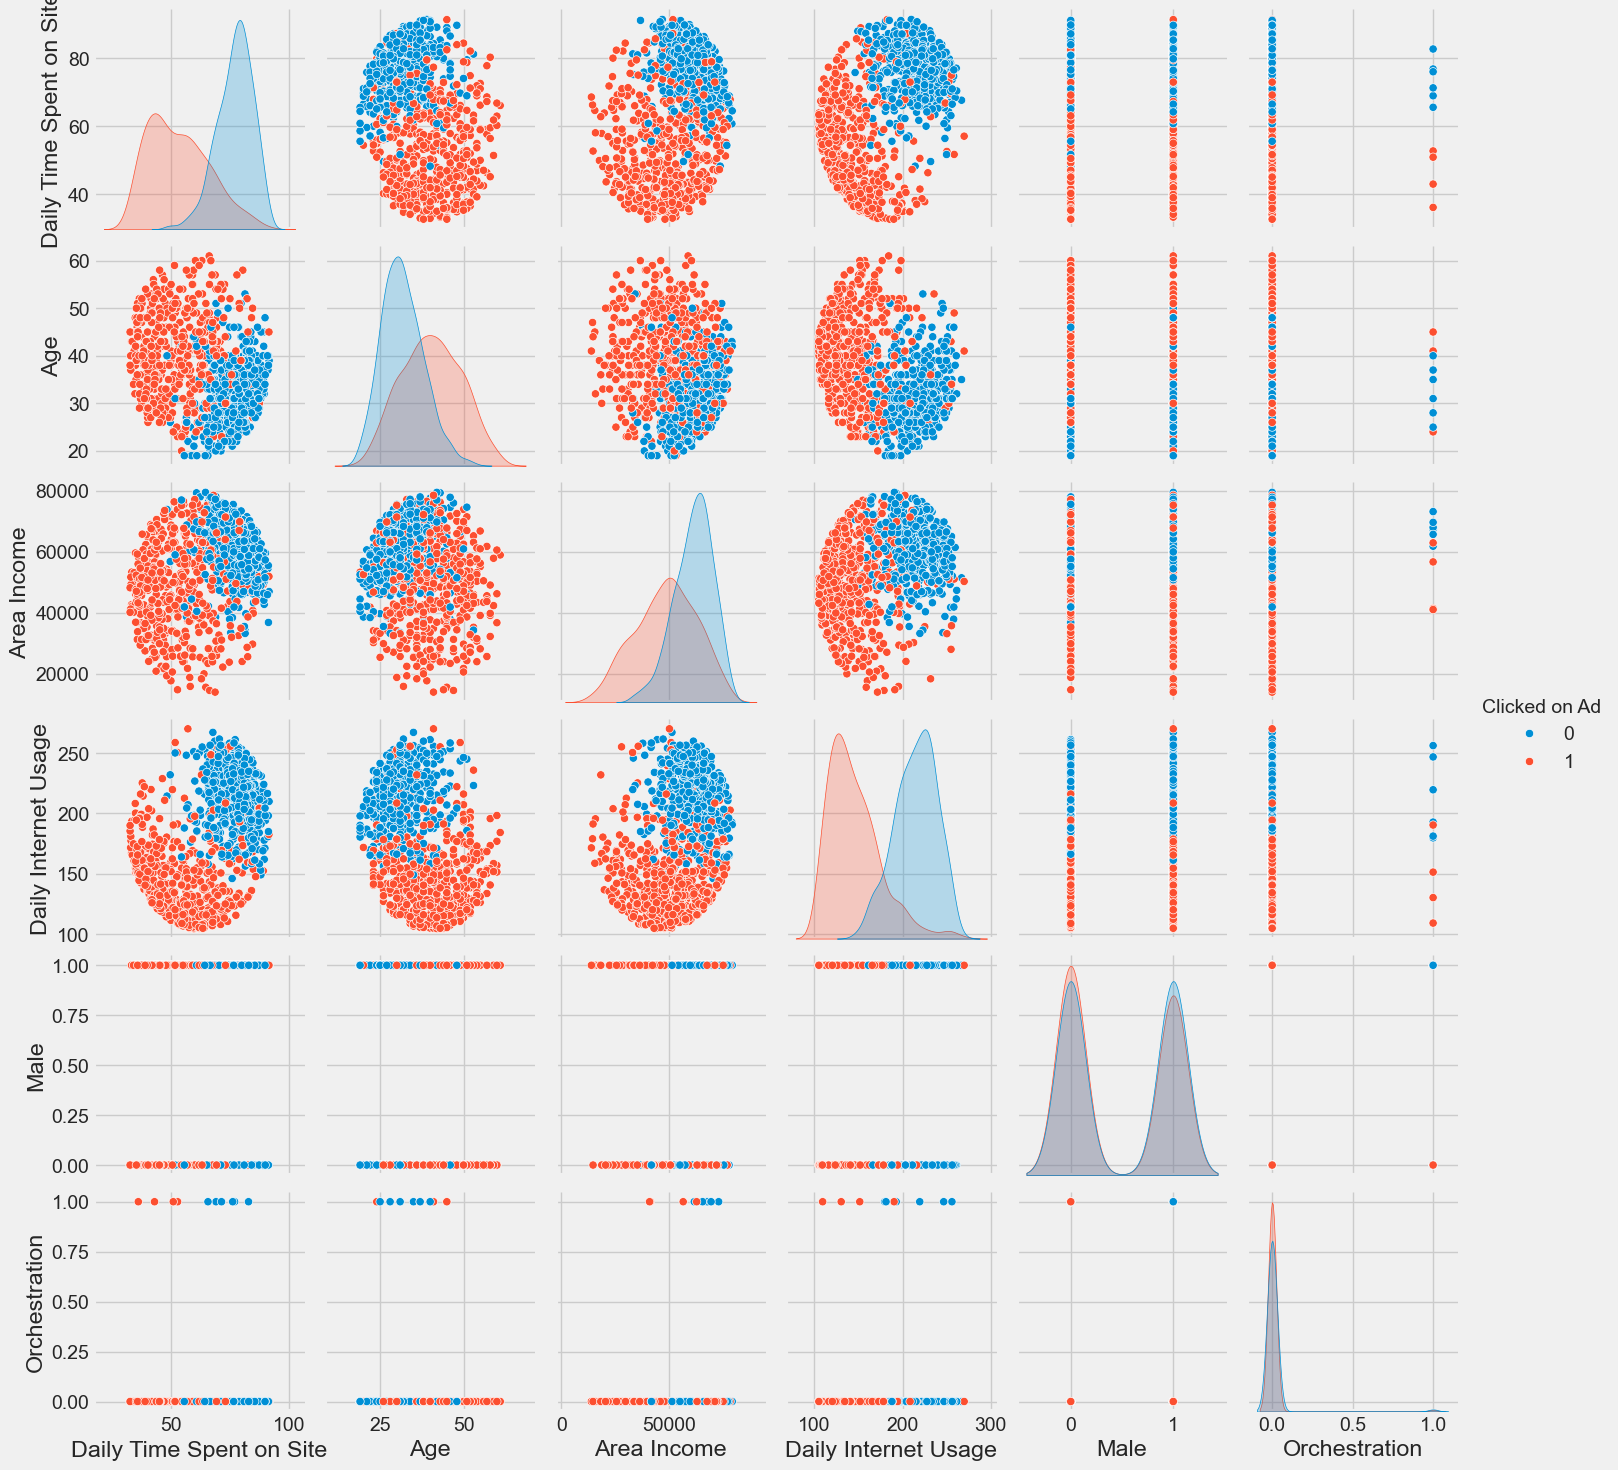

In [ ]:
sns.pairplot(adver_strings_removed, hue= "Clicked on Ad")

<Axes: >

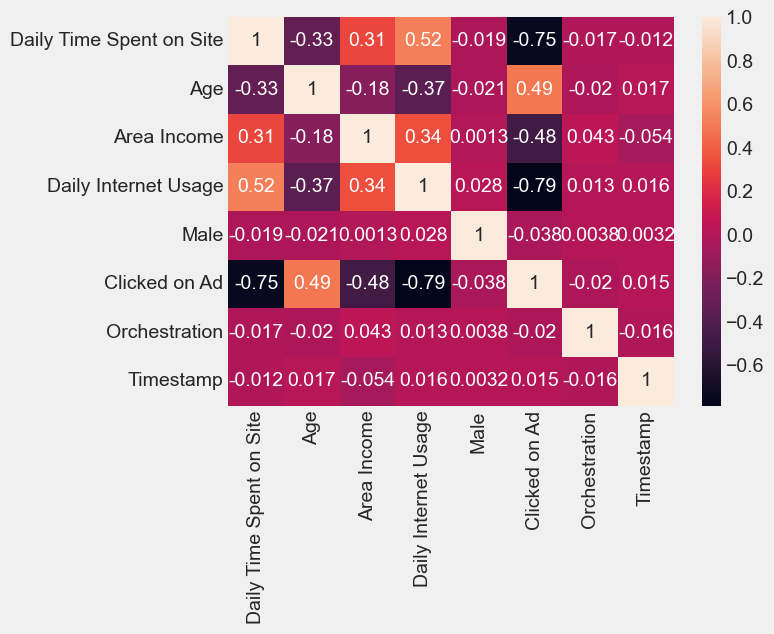

In [ ]:
sns.heatmap(adver_strings_removed.corr(), annot=True)

In [ ]:
# Ahora haz un drop de las columnas 'month', 'hour', 'weekday'.
# Si ya sé que las acabas de crear, pero asi es la vida :)
adver_strings_removed

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Orchestration,Timestamp
0,68.95,35,61833.90,256.09,0,0,1,2016-03-27 00:53:11
1,80.23,31,68441.85,193.77,1,0,0,2016-04-04 01:39:02
2,69.47,26,59785.94,236.50,0,0,0,2016-03-13 20:35:42
3,74.15,29,54806.18,245.89,1,0,0,2016-01-10 02:31:19
4,68.37,35,73889.99,225.58,0,0,0,2016-06-03 03:36:18
...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,0,2016-02-11 21:49:00
996,51.30,45,67782.17,134.42,1,1,0,2016-04-22 02:07:01
997,51.63,51,42415.72,120.37,1,1,0,2016-02-01 17:24:57
998,55.55,19,41920.79,187.95,0,0,0,2016-03-24 02:35:54


In [ ]:
adver_strings_removed

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Orchestration,Timestamp
0,68.95,35,61833.90,256.09,0,0,1,2016-03-27 00:53:11
1,80.23,31,68441.85,193.77,1,0,0,2016-04-04 01:39:02
2,69.47,26,59785.94,236.50,0,0,0,2016-03-13 20:35:42
3,74.15,29,54806.18,245.89,1,0,0,2016-01-10 02:31:19
4,68.37,35,73889.99,225.58,0,0,0,2016-06-03 03:36:18
...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,0,2016-02-11 21:49:00
996,51.30,45,67782.17,134.42,1,1,0,2016-04-22 02:07:01
997,51.63,51,42415.72,120.37,1,1,0,2016-02-01 17:24:57
998,55.55,19,41920.79,187.95,0,0,0,2016-03-24 02:35:54



#### 2. Train test split


In [ ]:
# Nuestra < y > (target) será "Clicked on Ad"
y = adver_strings_removed['Clicked on Ad']
X = adver_strings_removed[['Daily Time Spent on Site','Age','Area Income', 'Daily Internet Usage', 'Male', 'Orchestration']]

In [ ]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Orchestration
0,68.95,35,61833.90,256.09,0,1
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,0
996,51.30,45,67782.17,134.42,1,0
997,51.63,51,42415.72,120.37,1,0
998,55.55,19,41920.79,187.95,0,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
# te da varios datos classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [155]:
# train_test_split test_size = 0.2, random_state = 0
validation_size = 0.20
seed = 0
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

In [156]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 6)
(200, 6)
(800,)
(200,)



#### 3. StandardScaler()


In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
# Lo siguiente es la forma correcta de hacerlo, existe la posibilidad de hacer scaler.fit_transform pero no es recomendable

In [159]:

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [160]:
scaler.inverse_transform(X_train)

array([[7.327000e+01, 2.800000e+01, 6.730139e+04, 2.162400e+02,
        1.000000e+00, 0.000000e+00],
       [5.156000e+01, 4.600000e+01, 6.310219e+04, 1.248500e+02,
        0.000000e+00, 0.000000e+00],
       [5.630000e+01, 4.900000e+01, 6.743096e+04, 1.352400e+02,
        1.000000e+00, 0.000000e+00],
       ...,
       [7.394000e+01, 2.600000e+01, 5.541106e+04, 2.361500e+02,
        1.000000e+00, 0.000000e+00],
       [7.864000e+01, 3.100000e+01, 6.028347e+04, 2.352800e+02,
        1.000000e+00, 0.000000e+00],
       [4.206000e+01, 3.400000e+01, 4.324119e+04, 1.315500e+02,
        0.000000e+00, 0.000000e+00]])

# 3. Implement Logistic Regression in Scikit-Learn and predict

In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
from sklearn.model_selection import KFold, cross_val_score

In [163]:
# crea dos variables un LogisticRegression sin entrenar y un KFold(n_splits = 5)
# luego crea la varible que use cross_val_score que tenga dentro lo siguiente en este orden: 
# ( tu_modelo_LogisticRegression, X_train, y_train, cv = tu_variable_de_KFold, scoring = "accuracy" )

In [164]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [165]:
y_pred = model.predict(X_test)

In [166]:
print(cv_results)
print(cv_results.mean())
print(cv_results.std())

NameError: name 'cv_results' is not defined

# 4. Evaluate models


In [167]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [168]:
# Crea un variable y_pred que sean las predicciones del X_test
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0])

In [170]:
print(accuracy_score(y_test, y_pred))

0.98


0.98


#### 1. Confusion Matrix


In [172]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)

In [173]:
c_matrix

array([[107,   1],
       [  3,  89]])


#### 2. Precision


In [174]:
# TP/(TP+FP) = 89/(89+1)
107/(107+1)

0.9907407407407407

In [72]:
89/(89+1)

0.9888888888888889

0.9888888888888889



#### 3. Recall


In [ ]:
# TP/(TP+FN) = 89/(89+3)

In [73]:
89/(89+3)

0.967391304347826

0.967391304347826



#### 4. F1 Score


In [ ]:
# 2*precision*recall/(precision + recall) 

In [77]:
2*0.99*/(p+r)

0.978021978021978

0.978021978021978



#### 5. ROC curve

In [79]:
roc_auc_score(y_test, y_pred)

0.9790660225442834

In [80]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [87]:
thresholds

array([2, 1, 0], dtype=int64)

Text(0, 0.5, 'True Positive Rate')

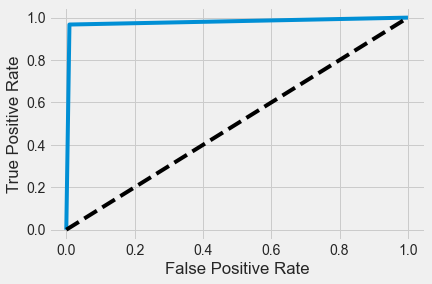

In [83]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [84]:
y_pred_prob = log_reg1.predict_proba(X_test)
y_pred_prob

array([[9.71313384e-01, 2.86866158e-02],
       [9.84732451e-01, 1.52675492e-02],
       [9.92174854e-01, 7.82514647e-03],
       [6.49223890e-04, 9.99350776e-01],
       [9.62620694e-01, 3.73793055e-02],
       [1.81672373e-05, 9.99981833e-01],
       [4.00962090e-04, 9.99599038e-01],
       [1.39025872e-04, 9.99860974e-01],
       [9.91603883e-01, 8.39611700e-03],
       [1.07185113e-01, 8.92814887e-01],
       [9.91158334e-01, 8.84166612e-03],
       [8.16125148e-01, 1.83874852e-01],
       [2.91690468e-04, 9.99708310e-01],
       [9.92154706e-01, 7.84529351e-03],
       [9.57947856e-01, 4.20521438e-02],
       [9.48341453e-01, 5.16585470e-02],
       [2.31316347e-03, 9.97686837e-01],
       [9.88254189e-01, 1.17458107e-02],
       [1.00678883e-04, 9.99899321e-01],
       [9.93449660e-01, 6.55034032e-03],
       [9.67979820e-01, 3.20201803e-02],
       [9.58188866e-01, 4.18111345e-02],
       [9.91073055e-01, 8.92694468e-03],
       [9.35674598e-01, 6.43254018e-02],
       [3.933832

In [88]:
log_reg1.classes_

array([0, 1], dtype=int64)

In [90]:
pred_prob_1 = y_pred_prob[:,1]

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_1)

In [ ]:
# fpr = FP/(TN+FP)

In [100]:
fpr[4]

0.009259259259259259

In [ ]:
# tpr = TP/(TP+FN)

In [101]:
tpr[4]

0.967391304347826

In [103]:
thresholds

array([1.99998183, 0.99998183, 0.81565203, 0.7879659 , 0.53351516,
       0.23504295, 0.20760222, 0.20133097, 0.18946342, 0.08902957,
       0.08403867, 0.00597066])

Text(0, 0.5, 'True Positive Rate')

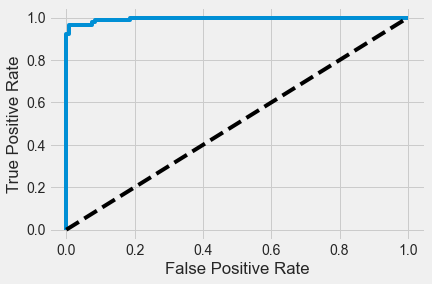

In [92]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [97]:
import numpy as np
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
thresholds[ix]

0.5335151634308553

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

In [110]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_prob_1)

In [111]:
precisions

array([0.82142857, 0.81981982, 0.82727273, 0.83486239, 0.84259259,
       0.85046729, 0.85849057, 0.86666667, 0.875     , 0.88349515,
       0.89215686, 0.9009901 , 0.91      , 0.90909091, 0.91836735,
       0.91752577, 0.92708333, 0.93684211, 0.94680851, 0.95698925,
       0.9673913 , 0.97802198, 0.98888889, 0.98876404, 0.98863636,
       0.98850575, 0.98837209, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [112]:
recalls

array([1.        , 0.98913043, 0.98913043, 0.98913043, 0.98913043,
       0.98913043, 0.98913043, 0.98913043, 0.98913043, 0.98913043,
       0.98913043, 0.98913043, 0.98913043, 0.97826087, 0.97826087,
       0.9673913 , 0.9673913 , 0.9673913 , 0.9673913 , 0.9673913 ,
       0.9673913 , 0.9673913 , 0.9673913 , 0.95652174, 0.94565217,
       0.93478261, 0.92391304, 0.92391304, 0.91304348, 0.90217391,
       0.89130435, 0.88043478, 0.86956522, 0.85869565, 0.84782609,
       0.83695652, 0.82608696, 0.81521739, 0.80434783, 0.79347826,
       0.7826087 , 0.77173913, 0.76086957, 0.75      , 0.73913043,
       0.72826087, 0.7173913 , 0.70652174, 0.69565217, 0.68478261,
       0.67391304, 0.66304348, 0.65217391, 0.64130435, 0.63043478,
       0.61956522, 0.60869565, 0.59782609, 0.58695652, 0.57608696,
       0.56521739, 0.55434783, 0.54347826, 0.5326087 , 0.52173913,
       0.51086957, 0.5       , 0.48913043, 0.47826087, 0.4673913 ,
       0.45652174, 0.44565217, 0.43478261, 0.42391304, 0.41304

In [115]:
thresholds

array([0.08403867, 0.08902957, 0.09257543, 0.09666638, 0.097511  ,
       0.10038035, 0.1075405 , 0.11834532, 0.12588388, 0.14508644,
       0.16557064, 0.18387485, 0.18946342, 0.20133097, 0.20760222,
       0.23504295, 0.3059493 , 0.32272044, 0.33267427, 0.42855247,
       0.43387196, 0.43769698, 0.53351516, 0.57130262, 0.73217208,
       0.76077602, 0.7879659 , 0.81565203, 0.88053272, 0.89083278,
       0.89281489, 0.90982192, 0.9138384 , 0.93348077, 0.95272042,
       0.95998276, 0.96326777, 0.97099074, 0.97229677, 0.97316412,
       0.97591748, 0.98801255, 0.99207157, 0.99246667, 0.99304312,
       0.99404366, 0.99422512, 0.99454002, 0.99569833, 0.99589067,
       0.99606617, 0.99628401, 0.99658137, 0.99670109, 0.99675501,
       0.9971252 , 0.99736143, 0.99747336, 0.99752621, 0.99768684,
       0.99776397, 0.99798142, 0.99800444, 0.99802155, 0.99829534,
       0.9984926 , 0.99878569, 0.99906264, 0.99915764, 0.99925337,
       0.99935078, 0.99947823, 0.99958415, 0.99959564, 0.99959

In [119]:
df_pr_curve = pd.DataFrame(precisions[1:], columns=['precisions'])
df_pr_curve['recalls'] = recalls[1:]
df_pr_curve['thresholds'] = thresholds
df_pr_curve

,precisions,recalls,thresholds
0,0.819820,0.989130,0.084039
1,0.827273,0.989130,0.089030
2,0.834862,0.989130,0.092575
3,0.842593,0.989130,0.096666
4,0.850467,0.989130,0.097511
...,...,...,...
107,1.000000,0.043478,0.999958
108,1.000000,0.032609,0.999960
109,1.000000,0.021739,0.999961
110,1.000000,0.010870,0.999980


In [134]:
df_pr_curve[10:30]

,precisions,recalls,thresholds
10,0.900990,0.989130,0.165571
11,0.910000,0.989130,0.183875
12,0.909091,0.978261,0.189463
13,0.918367,0.978261,0.201331
14,0.917526,0.967391,0.207602
15,0.927083,0.967391,0.235043
16,0.936842,0.967391,0.305949
17,0.946809,0.967391,0.322720
18,0.956989,0.967391,0.332674
19,0.967391,0.967391,0.428552


Text(0, 0.5, 'Recall')

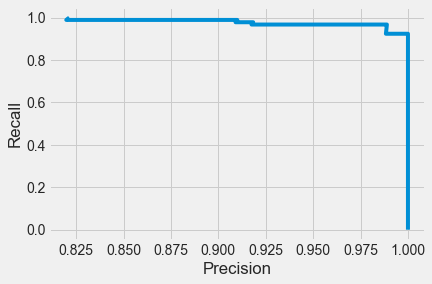

In [114]:
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")